In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"C:/Users/beomgyu2/AI_CLASS/AAME.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.00,4.05,3.85,3.85,3.213167,15000
1,1980-03-18,0.00,4.00,3.80,3.80,3.171437,10200
2,1980-03-19,0.00,4.05,3.85,3.85,3.213167,33500
3,1980-03-20,0.00,4.00,3.80,3.80,3.171437,8700
4,1980-03-21,0.00,3.95,3.75,3.75,3.129709,12700
...,...,...,...,...,...,...,...
10093,2020-03-26,2.29,2.29,2.08,2.28,2.280000,1600
10094,2020-03-27,2.25,2.25,2.21,2.25,2.250000,500
10095,2020-03-30,2.25,2.25,2.13,2.13,2.130000,400
10096,2020-03-31,2.11,2.11,2.11,2.11,2.110000,300


In [5]:
data = df['Open'].values.reshape(-1, 1)
data

array([[0.       ],
       [0.       ],
       [0.       ],
       ...,
       [2.25     ],
       [2.1099999],
       [2.1099999]])

In [7]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [9]:
def create_sequences(data, window_size):
    X = []
    y = []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

window_size = 5
X, y = create_sequences(data_scaled, window_size)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [13]:
model_lstm = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, activation='tanh', input_shape=(window_size, 1)),
    tf.keras.layers.Dense(1)
])

C:\Users\beomgyu2\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
model_lstm.compile(optimizer='adam', loss='mse')

In [17]:
model_lstm.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0106 - val_loss: 9.4657e-05
Epoch 2/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0034 - val_loss: 1.9444e-04
Epoch 3/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0038 - val_loss: 7.6781e-05
Epoch 4/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0034 - val_loss: 2.2496e-04
Epoch 5/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0035 - val_loss: 8.7286e-05
Epoch 6/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0033 - val_loss: 3.0627e-04
Epoch 7/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0033 - val_loss: 8.6736e-05
Epoch 8/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0026 - val_loss: 7.1100e-05
Epoch 9/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0030 - val_loss: 6.7733e-05
Epoch 10/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0031 - val_loss: 1.9445e-04
Epoch 11/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0029 - val_loss: 1.1917e-04
Epoch 12

In [19]:
pred_lstm = model_lstm.predict(X_test)

64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


In [21]:
pred_lstm = scaler.inverse_transform(pred_lstm)
y_test_true = scaler.inverse_transform(y_test)

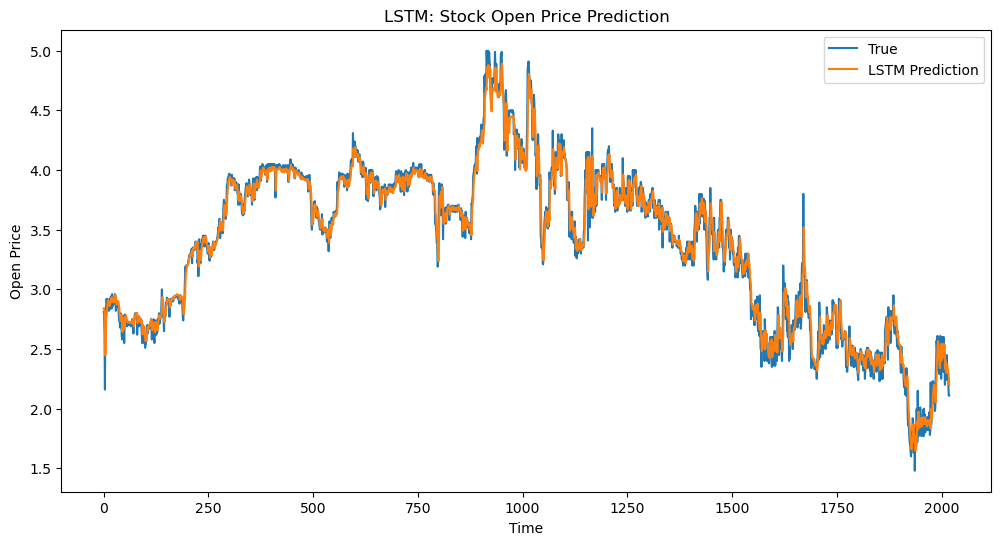

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_true, label='True')
plt.plot(pred_lstm, label='LSTM Prediction')
plt.legend()
plt.title('LSTM: Stock Open Price Prediction')
plt.xlabel('Time')
plt.ylabel('Open Price')
plt.show()